In [19]:
'''
Forward stepwise selection, we start with a null model and add a variable that will improve the accuracy of the model
Then we add another if it improves accuracy the moment it doesnt improve we stop including those variables, stepwise means
during this process of adding variables it also can remove a variable that we previously added
The goal is the continuing improvement and accuracy of the model until the variables being added dont provide any lift

Backward stepwise selection...the oposite of forward stepwise, we start with all the variables and start removing
one variable at a time

in python environment conda install -c conda-forge mlxtend

'''

import pandas as pd
from sklearn.datasets import load_boston

#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt



boston = load_boston()
print(boston.data.shape)         # for dataset dimension
print(boston.feature_names)      # for feature names
#print(boston.target)             # for target variable
#print(boston.DESCR)              # for data description



bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target

print(bos.head().T)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
                 0          1          2          3          4
CRIM       0.00632    0.02731    0.02729    0.03237    0.06905
ZN        18.00000    0.00000    0.00000    0.00000    0.00000
INDUS      2.31000    7.07000    7.07000    2.18000    2.18000
CHAS       0.00000    0.00000    0.00000    0.00000    0.00000
NOX        0.53800    0.46900    0.46900    0.45800    0.45800
RM         6.57500    6.42100    7.18500    6.99800    7.14700
AGE       65.20000   78.90000   61.10000   45.80000   54.20000
DIS        4.09000    4.96710    4.96710    6.06220    6.06220
RAD        1.00000    2.00000    2.00000    3.00000    3.00000
TAX      296.00000  242.00000  242.00000  222.00000  222.00000
PTRATIO   15.30000   17.80000   17.80000   18.70000   18.70000
B        396.90000  396.90000  392.83000  394.63000  396.90000
LSTAT      4.98000    9.14000    4.03000    2.94000    5.33000
Price     24.00000   

In [20]:
X = bos.copy()
X = X.drop("Price", axis=1)       # feature matrix 
Y = bos[ 'Price' ]           # target feature

print( X.head().T )
#print( Y.head() )

                 0          1          2          3          4
CRIM       0.00632    0.02731    0.02729    0.03237    0.06905
ZN        18.00000    0.00000    0.00000    0.00000    0.00000
INDUS      2.31000    7.07000    7.07000    2.18000    2.18000
CHAS       0.00000    0.00000    0.00000    0.00000    0.00000
NOX        0.53800    0.46900    0.46900    0.45800    0.45800
RM         6.57500    6.42100    7.18500    6.99800    7.14700
AGE       65.20000   78.90000   61.10000   45.80000   54.20000
DIS        4.09000    4.96710    4.96710    6.06220    6.06220
RAD        1.00000    2.00000    2.00000    3.00000    3.00000
TAX      296.00000  242.00000  242.00000  222.00000  222.00000
PTRATIO   15.30000   17.80000   17.80000   18.70000   18.70000
B        396.90000  396.90000  392.83000  394.63000  396.90000
LSTAT      4.98000    9.14000    4.03000    2.94000    5.33000


In [18]:

varNames = list( X.columns.values )
maxCols = X.shape[1]

In [23]:
#k_features = 1, maxcols looks for the best model with 1 variable, with 2 variables....best model using max col variables
# forward = True is forward 
#floating = True makes it a stepwise, add and subtract varaibles will take more time
#dont want to go down that road if you dont have to
#best thing to do with a large dataset is to do forward = true and floating = false
#cv is cross valiation cv=5 means we are going break the data into 5 datasets, build on 1-4 and test on 5
#then it builds on 1-3,5 and test on 4 etc.

sfs = SFS(LinearRegression(),
           k_features=( 1, maxCols ),
           forward=True,
           floating=False,
           scoring = 'r2',
           cv=5
           )
sfs.fit(X.values, Y.values)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=(1, 13), n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring='r2', verbose=0)

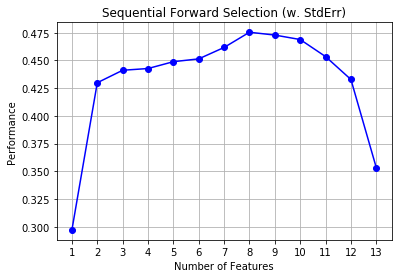

In [25]:
theFigure = plot_sfs(sfs.get_metric_dict(), kind=None )
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [24]:
dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T
dfm_names = dfm.columns.values
dfm = dfm[ ['feature_names', 'avg_score'] ]
print( dfm.head(13) )
print("before converting")
dt = dfm.dtypes
print( dt )
dfm.avg_score = dfm.avg_score.astype(float)
print("after converting")
dt = dfm.dtypes
print( dt )

                                 feature_names avg_score
1                                        (12,)   0.29711
2                                     (10, 12)  0.429882
3                                  (3, 10, 12)  0.441128
4                               (3, 5, 10, 12)    0.4427
5                            (0, 3, 5, 10, 12)  0.448866
6                        (0, 3, 5, 10, 11, 12)  0.451407
7                     (0, 3, 5, 7, 10, 11, 12)  0.461711
8                  (0, 2, 3, 5, 7, 10, 11, 12)  0.475429
9               (0, 1, 2, 3, 5, 7, 10, 11, 12)  0.472875
10           (0, 1, 2, 3, 4, 5, 7, 10, 11, 12)  0.468855
11        (0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12)  0.453487
12     (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12)  0.432817
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)  0.353276
before converting
feature_names    object
avg_score        object
dtype: object
after converting
feature_names     object
avg_score        float64
dtype: object


In [26]:
#If you have thousands of variables this code will return the highest avg score and the feature names
maxIndex = dfm.avg_score.argmax()
print("argmax")
print( dfm.iloc[ maxIndex, ] )
print(" ................... ")

argmax
feature_names    (0, 2, 3, 5, 7, 10, 11, 12)
avg_score                           0.475429
Name: 8, dtype: object
 ................... 


In [27]:
dfm_sort = dfm.sort_values(by='avg_score', ascending=False )
print( dfm_sort )
print(" ................... ")

                                 feature_names  avg_score
8                  (0, 2, 3, 5, 7, 10, 11, 12)   0.475429
9               (0, 1, 2, 3, 5, 7, 10, 11, 12)   0.472875
10           (0, 1, 2, 3, 4, 5, 7, 10, 11, 12)   0.468855
7                     (0, 3, 5, 7, 10, 11, 12)   0.461711
11        (0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12)   0.453487
6                        (0, 3, 5, 10, 11, 12)   0.451407
5                            (0, 3, 5, 10, 12)   0.448866
4                               (3, 5, 10, 12)   0.442700
3                                  (3, 10, 12)   0.441128
12     (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12)   0.432817
2                                     (10, 12)   0.429882
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   0.353276
1                                        (12,)   0.297110
 ................... 


In [28]:
theVars = dfm.iloc[ maxIndex, ]
theVars = theVars.feature_names
print( theVars )

('0', '2', '3', '5', '7', '10', '11', '12')


In [29]:
#This will change the variable number location to the actual variable names

theVarNames = []
for i in theVars :
    index = int(i)
    try :
        theName = varNames[ index ]
        theVarNames.append( theName )
    except :
        pass


for i in theVarNames :
    print(i)

CRIM
INDUS
CHAS
RM
DIS
PTRATIO
B
LSTAT


In [30]:
W = X[ theVarNames ]
m = LinearRegression()
m.fit( W, Y )

coef_dict = {}
coef_dict["INTERCEPT"] = m.intercept_
for coef, feat in zip(m.coef_,theVarNames):
    coef_dict[feat] = coef

for i in coef_dict :
    print( i, " = ", coef_dict[i]  )

INTERCEPT  =  19.048649665273295
CRIM  =  -0.056570619040968266
INDUS  =  -0.14254749122140326
CHAS  =  2.85491761037236
RM  =  4.297759362748854
DIS  =  -0.8382841748958589
PTRATIO  =  -0.8133606934962166
B  =  0.009322114851333786
LSTAT  =  -0.5582720449697681
